<a href="https://colab.research.google.com/github/amosonduru/Data-analysis-/blob/main/markov%20chain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Probability of being sick after 2 weeks: 0.3460
Probability of being sick at some point in the next 52 weeks: 0.2568
Probability of remaining healthy for the entire year: 0.7432
Transition Matrix Xt:
[[0.75 0.25 0.  ]
 [0.5  0.   0.5 ]
 [0.   0.25 0.75]]
Stationary Distributions:
[[0.08 0.2  0.72]
 [0.16 0.2  0.64]
 [0.24 0.2  0.56]
 [0.32 0.2  0.48]
 [0.4  0.2  0.4 ]
 [0.48 0.2  0.32]
 [0.56 0.2  0.24]
 [0.64 0.2  0.16]
 [0.72 0.2  0.08]]


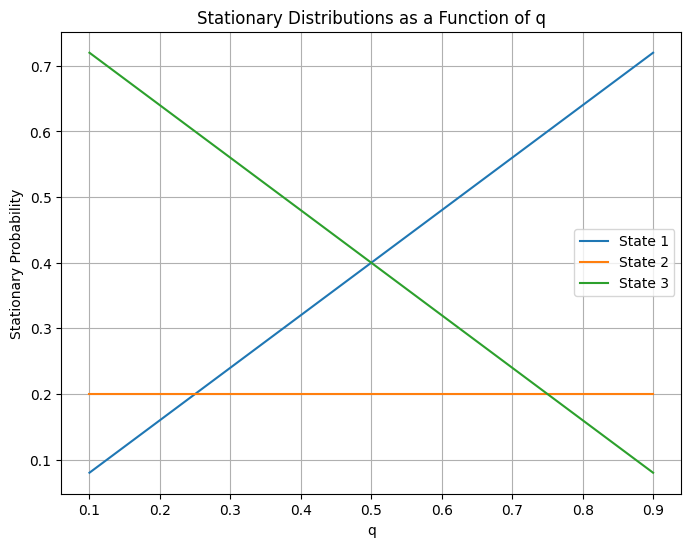

Transition Matrix for Taxi Zones:
[[0.3 0.3 0.4]
 [0.4 0.4 0.2]
 [0.5 0.3 0.2]]
Markov Chain object for taxi zones created.


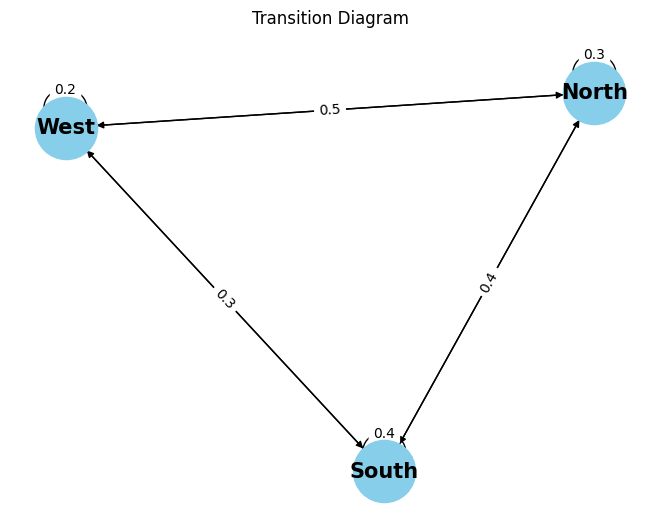

Probability of being in North after 2 trips: 0.4100
Probability of being in North after 3 trips: 0.3850
Stationary Distribution for taxi zones: [0.38888889 0.33333333 0.27777778]


In [ ]:
# QUESTION 1

### (i) Construct a Markov chain transition matrix.

import numpy as np

# Define the transition matrix
transition_matrix = np.array([
    [0.98, 0.019, 0.001],  # From H to H, S, D
    [0.2, 0.75, 0.05],     # From S to H, S, D
    [0, 0, 1]              # From D to H, S, D
])

# Define the state names
states = ['H', 'S', 'D']


## ii) Calculate the probability of being sick after 2 weeks given the initial state is healthy.

# Initial state vector (healthy)
initial_state = np.array([1, 0, 0])

# Compute the state distribution after 2 weeks
state_dist_2weeks = np.linalg.matrix_power(transition_matrix, 2).dot(initial_state)
prob_sick_2weeks = state_dist_2weeks[1]
print(f'Probability of being sick after 2 weeks: {prob_sick_2weeks:.4f}')


## iii) Calculate the probability of being sick at some point in the next 52 weeks.

# Compute the probability of being sick at some point in the next 52 weeks
prob_sick_52weeks = 1 - np.linalg.matrix_power(transition_matrix, 52)[0, 0]
print(f'Probability of being sick at some point in the next 52 weeks: {prob_sick_52weeks:.4f}')


##  (iv) Calculate the probability of remaining healthy for the entire year.

# Compute the probability of remaining healthy for 52 weeks
prob_healthy_year = np.linalg.matrix_power(transition_matrix, 52)[0, 0]
print(f'Probability of remaining healthy for the entire year: {prob_healthy_year:.4f}')


# Question 2
## (i) Construct a function to generate a Markov chain transition matrix

def generate_markov_chain(p, q, r):
    return np.array([
        [p, 1 - p, 0],
        [q, 0, 1 - q],
        [0, r, 1 - r]
    ])

# Example with p = 0.75 and r = 0.25
p = 0.75
r = 0.25
transition_matrix_xt = generate_markov_chain(p, 0.5, r)
print('Transition Matrix Xt:')
print(transition_matrix_xt)

# ii) Calculate the stationary distribution for values of q from 0.1 to 0.9.


def stationary_distribution(transition_matrix):
    eigvals, eigvecs = np.linalg.eig(transition_matrix.T)
    stationary = eigvecs[:, np.isclose(eigvals, 1)]
    stationary = stationary / stationary.sum()
    return stationary.real.flatten()

# Calculate stationary distributions for values of q from 0.1 to 0.9
q_values = np.arange(0.1, 1.0, 0.1)
stationary_distributions = []
for q in q_values:
    matrix = generate_markov_chain(p, q, r)
    stationary_dist = stationary_distribution(matrix)
    stationary_distributions.append(stationary_dist)

stationary_distributions = np.array(stationary_distributions)
print('Stationary Distributions:')
print(stationary_distributions)

# iii) Plot the stationary distributions as a function of q.

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
for i in range(stationary_distributions.shape[1]):
    plt.plot(q_values, stationary_distributions[:, i], label=f'State {i+1}')
plt.xlabel('q')
plt.ylabel('Stationary Probability')
plt.title('Stationary Distributions as a Function of q')
plt.legend()
plt.grid(True)
plt.show()


# Question 3
## (i) Create a vector with the state space.

states = ['North', 'South', 'West']
states

# ii) Construct a transition matrix for the taxi zones.

# Define the transition matrix for taxi zones
transition_matrix_taxis = np.array([
    [0.3, 0.3, 0.4],  # From North to North, South, West
    [0.4, 0.4, 0.2],  # From South to North, South, West
    [0.5, 0.3, 0.2]   # From West to North, South, West
])
print('Transition Matrix for Taxi Zones:')
print(transition_matrix_taxis)


## iii) Create a Markov Chain object with the state space and transition matrix.


# Markov Chain object (Python equivalent, not using specific library)
class MarkovChain:
    def __init__(self, states, transition_matrix):
        self.states = states
        self.transition_matrix = transition_matrix

# Create the Markov Chain object
taxis_markov = MarkovChain(states, transition_matrix_taxis)
print('Markov Chain object for taxi zones created.')

# iv) Draw the transition diagram for the Markov Chain.

import networkx as nx

def draw_transition_diagram(states, transition_matrix):
    G = nx.DiGraph()
    for i, state_from in enumerate(states):
        for j, state_to in enumerate(states):
            if transition_matrix[i, j] > 0:
                G.add_edge(state_from, state_to, weight=transition_matrix[i, j])
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=15, font_weight='bold', arrows=True)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.title('Transition Diagram')
    plt.show()

draw_transition_diagram(states, transition_matrix_taxis)


## (v) Calculate the probability of being in the North zone after two and three trips.

# Initial state vector (North)
initial_state_taxis = np.array([1, 0, 0])

# Probability of being in North after 2 trips
state_dist_2trips = np.linalg.matrix_power(transition_matrix_taxis, 2).dot(initial_state_taxis)
prob_north_2trips = state_dist_2trips[0]
print(f'Probability of being in North after 2 trips: {prob_north_2trips:.4f}')

# Probability of being in North after 3 trips
state_dist_3trips = np.linalg.matrix_power(transition_matrix_taxis, 3).dot(initial_state_taxis)
prob_north_3trips = state_dist_3trips[0]
print(f'Probability of being in North after 3 trips: {prob_north_3trips:.4f}')


# vi) Determine the stationary state of the Markov Chain.

# Calculate the stationary distribution for taxi zones
stationary_dist_taxis = stationary_distribution(transition_matrix_taxis)
print(f'Stationary Distribution for taxi zones: {stationary_dist_taxis}')